<a href="https://colab.research.google.com/github/umeshpin/math4ml/blob/main/A_Feature_Scaling_and_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Standardization

The result of **standardization** (or **Z-Score normalization**) is that the features will be re scaled so that they'll have the properties of a standard normal distribution with: 
$$\mu = 0$$
And
$$\sigma = 1$$

Where $\mu$ is the mean(average) and $\sigma$ is the standard deviation from the mean; standard scores (also called **Z** scores) of the sampels are calculated as follows: 
$$z = \frac{x - \mu}{\sigma}$$

Standardizing the features so that they are centered around $0$ with a standard deviation of $1$ is not only important if we are computing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example (an optimization algorithm) often used in: 

- `Logistic Regression`
- `Support Vector Machine`
- `Perceptrons`
- `Neural Network`

with features being on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in the weight updates:
$$\Delta w_j = -\eta \frac{\partial J}{\partial w_j} = \eta \sum_i (t^{i} - o^{i})x_j^{i}$$

So that $w_j := w_j + \Delta w_j$, where $\eta$ is the learning rate, $t$ the target class label, and $o$ the actual output. Other intuitive examples include: 

- `K_Nearest Neighbor`
- `Clustering`

Alorithms that use, for example: `Euclidean Distance Measures` - in fact, `tree-based` classifier are probably the only classifiers where feature scaling doesn't make a difference. 

In fact, the only family of algorithms that I could think of being scale-invariant are `tree-based` method. 

Let's take a general `CART Dicision Tree` algorithm. Without going into much depth regarding information gain and impurity measures, we can think of the decision as `is feature x_i >= some_value`? Intuitively, wen can see that it really doesn't matter on which scale this feature is. 

Some examples of algorithms where feature scaling matters are:

- `k-nearest neighbors` with `Euclidean Distance` measure if want all features to contribute equally. 
- `k-means` similar to `k-nearest neighbors`
- `LinearRegression`, `LogisticRegression`, `Support Vector Machine`, `Perceptrons`, `Neural Networks` as long as it using Gradient Descent Optimization. 
- `Linear Discriminant Analysis(LDA)`, `Princial Component Analysis(PCA)`, as long as it want to find directions of maximizing the variance (under the constraints that those directions/`eigenvectors`/`Principal Components` are orthogonal); you want to have features on the same scale since you'd emphasize variables on "larger measurement scales" more. 

In addition, we'd also want to think about whether we want to **Standardize** or **Normalize**(here: scaling to `[0, 1]` range) our data. Some algorithms assume that our data is centered at `0`. For example, if we initialize the weights of a small multi-layer perceptron with `tanh` activation units to `0` or small random values centered around zero, we want to update the model weights **equally**. As a rule of thumb: _When in doubt, just standardize the data, it shouldn't hurt_
***

# About Min-Max scaling

An alternative approach to **Z-Score** normalization (or called standardization) is the so-called **Min-Max Scaling** (often also simply called **Normalization** - a common cause for ambiguities)

In this approach, the data is scaled to a fixed range - usually `[0, 1]`. 
The cost of having this bounded range - in contrast to standrdization - is that we will end up with smaaller standard deviations, which can suppress the effect of outliers. 

**Note**:

If the dataset have lot's of outliers, and the algorithms are sensitive to outliers, please use `Min-Max Scaler`

A `Min-Max Scaling` is typically done via the foloowing equation: 

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset. 


# Z-Score Standardization or Min-Max Scaling

"Standardization or Min-Max scaling"? - There is no obvious answer to this question: it really depends on the application. 

For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the `Principal Component Analysis`, where we usually prefer `Standardization` over `Min-Max Scaling`, since we are interested in the components that maximize the variance(depending on the question and if the PCA computes the components via the correaltion matrix instead of the covariance matrix)

However this doesn't mean that `Min-Max Scaling` is not useful at all, A popular application is `image processing`, where pixel intensities have to be normalized to fit withint a certain range (i.e., `[0, 255]` for the RGB colour range). Also, typical _Neural Network_ Algorithm require data that on a `0 - 1` scale. 

# Standardizing and Normalizing - How it can be done using `scikit-learn`

Of course, we could make use of NumPy's vectorization capabilities to calculate the `Z-Score` for standardization and normalize the data using the equations that were mentioned in the previous sections. However, there is even more convenient aapproach using the preprocessing module from one of Python's open-source maachine learning library [scikit-learn](http://scikit-learn.org/)

For the following examples anad discussing, we will have a look at free `Wine` Dataset that is deposited on the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)

> Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

> Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The `Wine` dataset consists of `3` different classes where each row correspond to aa particular wine sample. 

The class label `(1, 2, 3)` are listed in the `1st` column, and the columns `2 - 14` correspond to `13` different attributes(features): 

- Alcohol
- Malic Acid
- 
...

## Loading the wine dataset

In [ ]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

df = pd.read_csv(url, header=None, usecols=[0, 1, 2])
df.columns = ['Label', 'Alcohol', 'MalicAcid']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      178 non-null    int64  
 1   Alcohol    178 non-null    float64
 2   MalicAcid  178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [ ]:
df.head()

,Label,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


As we can see in the table above, the features **Aalcohol**(per cent/Volume) and **Malic Acid**(g/l) are meaasured on different scales, so that **Feature Scaling** is necessary important perior to any comparison or combination of these data. 

## Standardization and Min-Max Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standard_scale = StandardScaler()
df_stdScale = standard_scale.fit_transform(df[['Alcohol', 'MalicAcid']])
df_stdScale[:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [ ]:
minmax_scale = MinMaxScaler()
df_minmax = minmax_scale.fit_transform(df[['Alcohol', 'MalicAcid']])
df_minmax[:5]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265]])

In [ ]:
print(f"The mean of Standard Scaling: {np.mean(df_stdScale):.2f}")
print(f"The Standard Deviation of Standard Scaling: {np.std(df_stdScale):.2f}")

The mean of Standard Scaling: -0.00
The Standard Deviation of Standard Scaling: 1.00


In [ ]:
print(f"The min of Min-Max Scaling: {df_minmax.min():.2f}")
print(f"The max of Min-Max Scaling: {df_minmax.max():.2f}")
print(f"The mean of Min-Max Scaling: {np.mean(df_minmax):.2f}")
print(f"The Standard Deviation of Min-Max Scaling: {np.std(df_minmax):.2f}")

The min of Min-Max Scaling: 0.00
The max of Min-Max Scaling: 1.00
The mean of Min-Max Scaling: 0.42
The Standard Deviation of Min-Max Scaling: 0.24


## Plotting

In [ ]:
%matplotlib inline

from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))
    plt.scatter(df['Alcohol'], df['MalicAcid'],
                color='green', label='Input Scale', alpha=0.5)
    plt.scatter(df_stdScale[:, 0], df_stdScale[:, 1],
                color='red', label='Standardized [mean=0, std=1]', alpha=0.3)
    plt.scatter(df_minmax[:, 0], df_minmax[:, 1], label='min-max scaled [min=0, max=1]', alpha=0.3)
    
    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

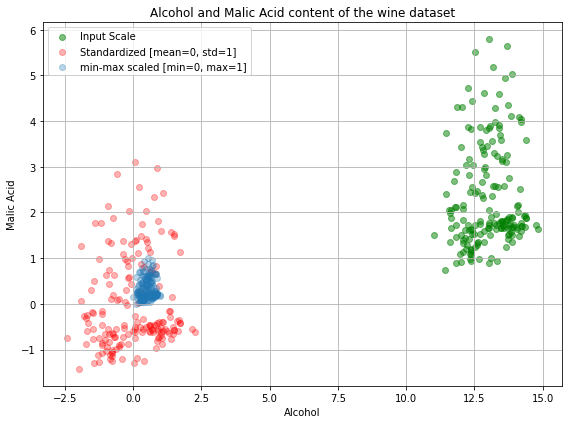

In [ ]:
plot()
plt.show()

The plot above includes the wine datapoints on all `3` different scale: 
- **Input Scale** Original Input Scale
- **Standardized** Using `sklearn` `StandardScaler`
- **min-max scaled** Using `sklearn` `MinMaxScaler`

Next Plot we will zoom in each of `3` scale to see the label distribution, they should have the same location/distribution, but just the difference of scale

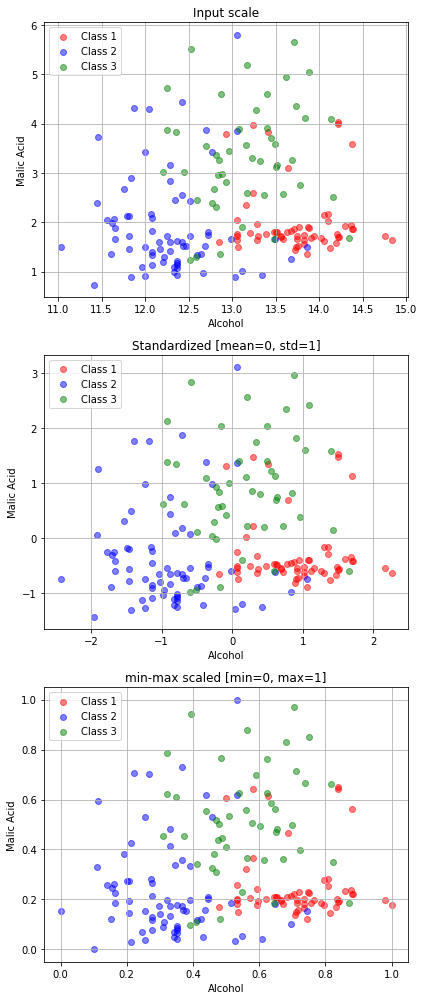

In [ ]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'MalicAcid']].values, df_stdScale, df_minmax),
               ('Input scale',
                'Standardized [mean=0, std=1]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Label'].values == i, 0],
                  d[df['Label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()
plt.show()

# Bottom-up Approaches

We can also code the equations for standardization and `[0, 1]` Min-Max scaling _Manually_. However, the scikit-learn methods are still useful if you are working with test and training data sets and want to scale them equally. 

```python
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
```

Here we try to perform the computation using native Python code, and more convenient `NumPy` solution, which is especially useful if we attempt to transform the whole matrix. 

Recall the equations: 

- **Standardization**:
$$z = \frac{x - \mu}{\sigma}$$

- **Mean:**
$$\mu = \frac{1}{N}\sum_{i=1}^{N}(x_i)$$

- **Standard Deviation:**
$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2}$$

- **Min-Max Scaling:**
$$X_{norm} = \frac{X_i - X_{min}}{X_{max} - X_{min}}$$

## Native Python
***

In [ ]:
# Standardization

x = [1, 4, 5, 6, 6, 2, 3]
mean = sum(x)/len(x)

std_dev = (1/len(x) * sum([(x_i - mean)**2 for x_i in x]))**0.5

z_scores = [(x_i - mean)/std_dev for x_i in x]

print("Native Python")
print(f"Array X: {x}\n")
print(f"Array X mean: {mean}\n")
print(f"Array X Standard Deviation: {std_dev}\n")
print(f"Array X Z Scores: {z_scores}\n")

print("NumPy for cross validation")
print(f"Numpy Array: {x}\n")
print(f"Numpy Array mean: {np.mean(x)}\n")
print(f"Numpy Array Standard Deviation: {np.std(x)}\n")
print(f"Numpy Z Scores: {[(x_i - np.mean(x))/np.std(x) for x_i in x]}\n")

print(f"Min-Max: {[(x_i - min(x))/ (max(x) - min(x)) for x_i in x]}")

Native Python
Array X: [1, 4, 5, 6, 6, 2, 3]

Array X mean: 3.857142857142857

Array X Standard Deviation: 1.8070158058105026

Array X Z Scores: [-1.5811388300841895, 0.07905694150420944, 0.6324555320336758, 1.185854122563142, 1.185854122563142, -1.0277402395547233, -0.4743416490252569]

NumPy for cross validation
Numpy Array: [1, 4, 5, 6, 6, 2, 3]

Numpy Array mean: 3.857142857142857

Numpy Array Standard Deviation: 1.8070158058105026

Numpy Z Scores: [-1.5811388300841895, 0.07905694150420944, 0.6324555320336758, 1.185854122563142, 1.185854122563142, -1.0277402395547233, -0.4743416490252569]

Min-Max: [0.0, 0.6, 0.8, 1.0, 1.0, 0.2, 0.4]


For some dataset, `Min-Max Scaling` will create some, or lot's of Sparse value (lot's of `0`) and some values will be truncated (capped at `1`), so please take note on this. 

## NumPy
***

In [ ]:
import numpy as np

# Standardization

x_np = np.array(x)

z_scores_np = (x_np - x_np.mean()) / x_np.std()

print(f"X NumPy array: {x_np}\n")
print(f"Z scores in Numpy: \n{z_scores_np}")

X NumPy array: [1 4 5 6 6 2 3]

Z scores in Numpy: 
[-1.58113883  0.07905694  0.63245553  1.18585412  1.18585412 -1.02774024
 -0.47434165]


In [ ]:
# min-max scaling
np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())
print(f"Min-Max scaling in Numpy: \n{np_minmax}")

Min-Max scaling in Numpy: 
[0.  0.6 0.8 1.  1.  0.2 0.4]


# The effect of standardization on PCA in a pattern classification task


Previous chapter we have mentioned the `Principal Component Analysis(PCA)` as an example where standardization is crucial, since it is _analyzing_ the variances of the different features. Now, let's see how the standardization affects `PCA` and a following supervised classification on the whole wine dataset. 

We will go through the following steps: 

- `read_csv` the whole dataset
- `train_test_split` split the dataset into `training` set and `testing` set. 
- Standardization the features
- `PCA` to reduce dimensionality
- Train a classifier
- Evaluate the performance **with** and **without** standardization. 

## Read full dataset
***

In [ ]:
df = pd.read_csv(url, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Spliting the dataset into `train` set and `test` set

We will use `sklearn`'s `train_test_split` function to randomly split the wine dataset into `training` set and `test` set where the `training` set will contain `70%` of the samples and the `test` set will contain `30%` respectively. 
***

In [ ]:
from sklearn.model_selection import train_test_split

X = df.values[:, 1:]
y = df.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
print(f"The shape of X_train is: {X_train.shape}\n")
print(f"The shape of X_test is {X_test.shape}")

The shape of X_train is: (124, 13)

The shape of X_test is (54, 13)


## Feature Scaling -- Standardization
***

In [ ]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

## Dimensionality reduction via Principal Component Analysis(PCA)

Now, we perform PCA on the `standardized` and the `non-standardized` datasets to transform the dataset onto a **2-dimensional** feature subspace. 

In a real application, a procedure like cross-validation would be done in order to find out what choice of features would yield a optimal balance between **Preserving Information** and **Overfitting** for different classfiers. However, we will omit this step since we don't want to train a perfect classifier here, but merely compare the effects of `standardization`. 

In [ ]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# om standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

Let us quickly visualize how our new feature subspace looks like (note that class labels are not considered in a PCA - in contrast to a Linear Discriminant Analysis - but I will add them in the plot for clarity).

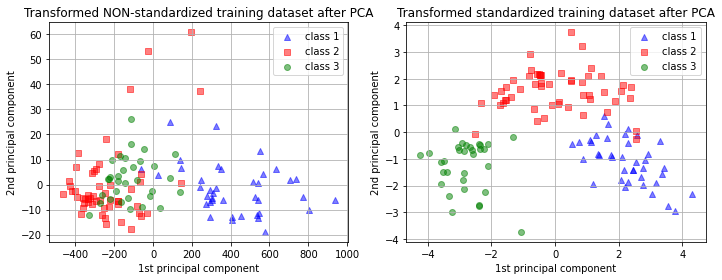

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

Before we train a classifier to classifi the class, we can see clearly from the plot that, on the left, the `training` set **without Standardization** , would be difficult to find the decision boundary. But on the right, the `training` set **with Standardization**, the decision boundary is much clearer than left one. 

## Train a naive Bayes Classifier

We will use a naive Bayes classifier for the classification task. If you not familiar with it, the term **naive** comes from the assumption that all features are **independent** with no interference at all, which almost impossible in real-world. 
it works based on Bayes' Rule: 

$$P(w_j | x) = \frac{p(x | w_j) \times P(w_j)}{p(x)}$$

where:

- $w$: class label. 
- $P(w|x)$: posterior probability
- $p(x|w)$: prior probability (or likelihood)

And the **Decesion Rule:**

$$w_1$$ if $$P(w_1|x) > P(w_2|x)$$ else $$w_2$$

$$=\frac{p(x|w_1) \times P(w_1)}{p(x)} > \frac{p(x|w_2) \times P(w_2)}{p(x)}$$

In [ ]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
gnb_std.fit(X_train_std, y_train)

GaussianNB()

In [ ]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset without Standardization')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset without Standardization')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset without Standardization
81.45%

Prediction accuracy for the test dataset without Standardization
64.81%



In [ ]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset with Standardization')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset with Standardization')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset with Standardization
96.77%

Prediction accuracy for the test dataset with Standardization
98.15%



## Other Classifier



In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf_std = DecisionTreeClassifier()
clf_std.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [ ]:
pred_train_clf = clf.predict(X_train)
print(f"\nPrediction accuracy for the training dataset without Standardization")
print(f"{metrics.accuracy_score(y_train, pred_train_clf):.2%}")


Prediction accuracy for the training dataset without Standardization
100.00%


In [ ]:
pred_train_clf_test = clf.predict(X_test)
print("\nPrediction accuracy for the test dataset without Standardization")
print(f"{metrics.accuracy_score(y_test, pred_train_clf_test):.2%}")


Prediction accuracy for the test dataset without Standardization
68.52%


In [ ]:
pred_train_clf_std = clf_std.predict(X_train_std)
print('\nPrediction Accuracy for the training dataset with Standardization')
print(f"{metrics.accuracy_score(y_train, pred_train_clf_std):.2%}")


Prediction Accuracy for the training dataset with Standardization
100.00%


In [ ]:
pred_train_clf_std_test = clf_std.predict(X_test_std)
print('\nPrediction Accuracy for the test dataset with Standardization')
print(f"{metrics.accuracy_score(y_test, pred_train_clf_std_test):.2%}")


Prediction Accuracy for the test dataset with Standardization
96.30%


As we can see, the standardization prior to the PCA definitely led to an decrease in the empirical error rate on classifying samples from test dataset.

In **Naive Bayes** Classifier, before **Standardization** classifier after `PCA` perform to around $64.81\%$ accuracy, after **Standardization**, performance increase to $98.15\%$

Similar to `DecesionTreeClassifier`, test set performance increase from $68.52\%$ to $96.30\%$

# Appendix: The effect of scaling and mean centering of variable prior to PCA
***

## Mean centering does not affect the covariance matrix
Here, the rational is: If the covariance is the same whether the variables are centered or not, the result of the PCA will be the same.

Let’s assume we have the 2 variables $x$ and $y$. Then the covariance between the attributes is calculated as

$$\sigma_{xy} = \frac{1}{N-1}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})$$

Let's write the centered variables as: 
$$x^{'}= x - \bar{x}$$
And
$$y^{'}= y - \bar{y}$$

The centered covariance would then be calculated as follows:
$$\sigma^{'}_{xy} = \frac{1}{n-1}\sum_i^n(x^{'}_i - \bar{x}^{'})(y^{'}_i - \bar{y}^{'})$$

But since after centering, $\bar{x}^{'}=0$ and $\bar{y}^{'}=0$ we have $\sigma^{'}_{xy} = \frac{1}{n-1}\sum^n_ix_i^{'}y_i^{'}$ which is our original convariance matrix if we resubstitute back the terms $x^{'}=x - \bar{x}$ and $y^{'} = y - \bar{y}$

Even centering only one variable, let's say $X$ wouldn't affect the covariance: 

$$\sigma_{xy} = \frac{1}{n-1}\sum_i^n(x_i^{'} - \bar{x}^{'})(y_i - \bar{y})$$
$$=\frac{1}{n-1}\sum_i^n(x_i^{'} - 0)(y_i - \bar{y})$$
$$=\frac{1}{n-1}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})$$

## Scaling of variables does affect the covariance matrix
If one variable is scaled, e.g., from Pounds into Kilogram ($1$ pound = $0.453591$ kg), it does affect the covariance and therefore influences the result of PCA. 

Let $c$ be the scaling factor for $X$
Given that the **original** covariance is computed as: 
$$\sigma_{xy} = \frac{1}{n - 1}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})$$

the covariance after scaling would be computed as: 
$$\sigma_{xy}^{'} = \frac{1}{n-1}\sum_i^n(c \times x_i - c \times \bar{x})(y_i - \bar{y})$$
$$=\frac{c}{n-1}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})$$

So we have:
$$\sigma_{xy} = \frac{\sigma_{xy}^{'}}{c} = C \times \sigma_{xy}$$

Therefore, the covariance after scaling one attribute by the constant $c$ will result in a rescaled covariance $c\sigma_{xy}$ So if we'd scaled $X$ from pounds to kilograms, the covariance between $X$ and $Y$ will be $0.453592$ times smaller. 

## Standardizing affects the covariance
Standardization of features will have an effect on the outcome of a PCA (assuming that the variables are originally not standardized). This is because we are scaling the covariance between every pair of variables by the product of the standard deviations of each pair of variables.

The equation for standardization of a variable is written as

$$z=\frac{x_i - \bar{x}}{\sigma}$$

The **Original** covariance matrix: 

$$\sigma_{xy} = \frac{1}{n-1}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})$$

And after standardizing both variables: 

$$x^{'} = \frac{x - \bar{x}}{\sigma_x}$$ and $$y^{'}=\frac{y-\bar{y}}{\sigma_y}$$

$$\sigma^{'}_{xy} = \frac{1}{n-1}\sum_i^n(x_i^{'} - 0)(y_i^{'}-0)$$
$$=\frac{1}{n-1}\sum_i^n(\frac{x-\bar{x}}{\sigma_x})(\frac{y-\bar{y}}{\sigma_y})$$
$$=\frac{1}{(n-1) \times \sigma_x\sigma_y}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})$$
$$=\frac{\sigma_{xy}}{\sigma_x\sigma_y}$$